In [14]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from PIL import Image
import cv2
import os

### Path to zip folder
zip_path = "C:/Users/Sven Jacob/Downloads/Video_006.zip"

img_folder = "Video_006/Video_006/"

with zipfile.ZipFile(zip_path, 'r') as zip_file:
    file_names = zip_file.namelist()
    print(file_names)
    png_files = [f for f in file_names if f.startswith("Video_006/Video_006/Img") and f.lower().endswith(".bmp")]
    png_files = np.sort(png_files)
    #print(png_files)
    frames = []
    for png in png_files:
        with zip_file.open(png) as file:
            image_bytes = file.read()
            image_array = np.frombuffer(image_bytes, dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
            frames.append(image)

['Video_006/', 'Video_006/Video_006/', 'Video_006/Video_006.avi', 'Video_006/Video_006.xml', 'Video_006/Video_006/Img_00039.bmp', 'Video_006/Video_006/Img_00040.bmp', 'Video_006/Video_006/Img_00041.bmp', 'Video_006/Video_006/Img_00042.bmp', 'Video_006/Video_006/Img_00043.bmp', 'Video_006/Video_006/Img_00044.bmp', 'Video_006/Video_006/Img_00045.bmp', 'Video_006/Video_006/Img_00046.bmp', 'Video_006/Video_006/Img_00385.bmp', 'Video_006/Video_006/Img_00386.bmp', 'Video_006/Video_006/Img_00387.bmp', 'Video_006/Video_006/Img_00388.bmp', 'Video_006/Video_006/Img_00389.bmp', 'Video_006/Video_006/Img_00390.bmp', 'Video_006/Video_006/Img_00391.bmp', 'Video_006/Video_006/Img_00392.bmp', 'Video_006/Video_006/Img_00393.bmp', 'Video_006/Video_006/Img_00394.bmp', 'Video_006/Video_006/Img_00395.bmp', 'Video_006/Video_006/Img_00461.bmp', 'Video_006/Video_006/Img_00462.bmp', 'Video_006/Video_006/Img_00463.bmp', 'Video_006/Video_006/Img_00464.bmp', 'Video_006/Video_006/Img_00465.bmp', 'Video_006/Video_00

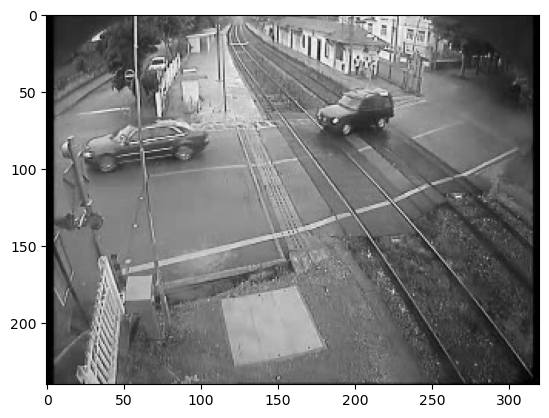

In [24]:
plt.imshow(frames[75],cmap='gray')

In [25]:
M = np.vstack([f.flatten() for f in frames])
M.shape

(86, 76800)

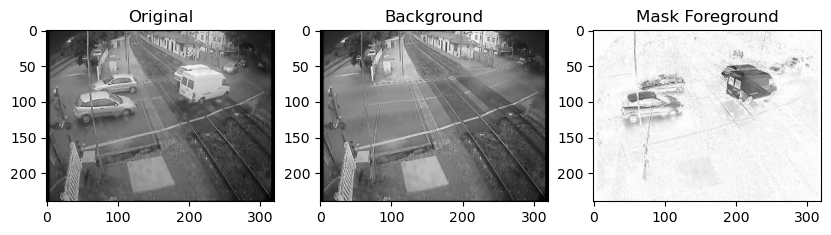

In [ ]:
U,s,Vt = np.linalg.svd(M,full_matrices=False)
L=1

S_truncated = np.zeros_like(s)
S_truncated[:L] = s[:L]


frame = 65
M_background = U @ np.diag(S_truncated) @ Vt 
background_frames = M_background.reshape((-1, frames[0].shape[0],frames[0].shape[1]))
fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[1].imshow(background_frames[frame],cmap='gray')
ax[1].set_title('Background')
ax[0].imshow(frames[frame],cmap='gray');
ax[0].set_title('Original')
ax[2].imshow(np.abs(frames[frame]-background_frames[frame]),cmap='binary');
ax[2].set_title('Mask Foreground');